In [1740]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("/content/sample_data/ElecDeviceRatingPrediction.csv")
electro = df.copy()
electro.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,45990,3 stars,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,No warranty,No,No,106167,4 stars,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,4 stars,42,4
4,HP,AMD,Ryzen 7,Not Available,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,3 stars,23,6


In [1741]:
#check the datatypes
electro.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [1742]:
#convert to the correct datatype
electro['Touchscreen']=electro['Touchscreen'].astype('category')
electro['msoffice']=electro['msoffice'].astype('category')
electro['rating']=electro['rating'].str.strip('stars')
electro['rating']=electro['rating'].astype('category')
electro['ram_gb']=electro['ram_gb'].str.strip('GB')
electro['ram_gb']=electro['ram_gb'].astype('int')
electro['ssd']=electro['ssd'].str.strip('GB')
electro['ssd']=electro['ssd'].astype('int')
electro['hdd']=electro['hdd'].str.strip('GB')
electro['hdd']=electro['hdd'].astype('int')


In [1743]:
electro['graphic_card_gb']=electro['graphic_card_gb'].str.strip('GB')
electro['graphic_card_gb']=electro['graphic_card_gb'].astype('int')

In [1744]:
electro['warranty']=electro['warranty'].str.strip('year || years')
electro['warranty']=electro['warranty'].str.replace('No warrant','0')
electro['warranty']=electro['warranty'].astype('int')

In [1745]:
electro['processor_gnrtn']=electro['processor_gnrtn'].str.strip('th')
electro['processor_gnrtn']=electro['processor_gnrtn'].str.replace('Not Available','0')


In [1746]:
electro[['hdd', 'ssd' , 'rating' ,'ram_gb','graphic_card_gb','warranty','processor_gnrtn']]

,hdd,ssd,rating,ram_gb,graphic_card_gb,warranty,processor_gnrtn
0,512,0,3,4,0,0,0
1,512,0,4,8,4,0,10
2,512,0,3,4,0,0,0
3,0,256,4,4,0,1,11
4,0,512,3,16,2,1,0
...,...,...,...,...,...,...,...
718,0,256,4,4,0,0,11
719,0,512,3,8,0,0,11
720,0,512,4,8,0,3,11
721,512,0,4,8,8,0,10


In [1747]:
electro.dtypes

brand                  object
processor_brand        object
processor_name         object
processor_gnrtn        object
ram_gb                  int64
ram_type               object
ssd                     int64
hdd                     int64
os                     object
graphic_card_gb         int64
weight                 object
warranty                int64
Touchscreen          category
msoffice             category
Price                   int64
rating               category
Number of Ratings       int64
Number of Reviews       int64
dtype: object

In [1748]:
#check the ranges
electro.describe()

,ram_gb,ssd,hdd,graphic_card_gb,warranty,Price,Number of Ratings,Number of Reviews
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,8.724758,449.150761,232.984786,1.208852,0.716459,77031.348548,301.217151,36.550484
std,4.439221,318.015040,416.286290,2.053125,0.605691,45706.444883,970.519221,115.413126
min,4.000000,0.000000,0.000000,0.000000,0.000000,16990.000000,0.000000,0.000000
25%,4.000000,256.000000,0.000000,0.000000,0.000000,45960.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,0.000000,1.000000,64990.000000,17.000000,2.000000
75%,8.000000,512.000000,512.000000,2.000000,1.000000,89846.000000,154.000000,19.500000
max,32.000000,3072.000000,2048.000000,8.000000,3.000000,441990.000000,15279.000000,1947.000000


In [1749]:

electro['processor_gnrtn'].unique()

array(['0', '10', '11', '8', '7', '12', '9', '4'], dtype=object)

In [1750]:
electro.loc[electro['processor_gnrtn'] == '0' , 'processor_gnrtn'] = electro['processor_gnrtn'].value_counts().idxmax()

In [1751]:
electro['processor_gnrtn']=electro['processor_gnrtn'].astype('category')

In [1752]:
electro['processor_gnrtn'].unique()

['11', '10', '8', '7', '12', '9', '4']
Categories (7, object): ['10', '11', '12', '4', '7', '8', '9']

In [1753]:
electro['rating'].unique()

['3 ', '4 ', '5 ', '2 ', '1 ']
Categories (5, object): ['1 ', '2 ', '3 ', '4 ', '5 ']

In [1754]:
#check for duplicates
duplicates = electro.duplicated(keep=False)
duplicates.sum()

30

In [1755]:
electro.drop_duplicates(inplace=True)

In [1756]:
duplicates = electro.duplicated(keep=False).sum()
duplicates

0

In [1757]:
electro[(electro['processor_gnrtn']=='0') & (electro['ssd']==0) & (electro['hdd']==0)]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews


In [1758]:
#check missing data
electro.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

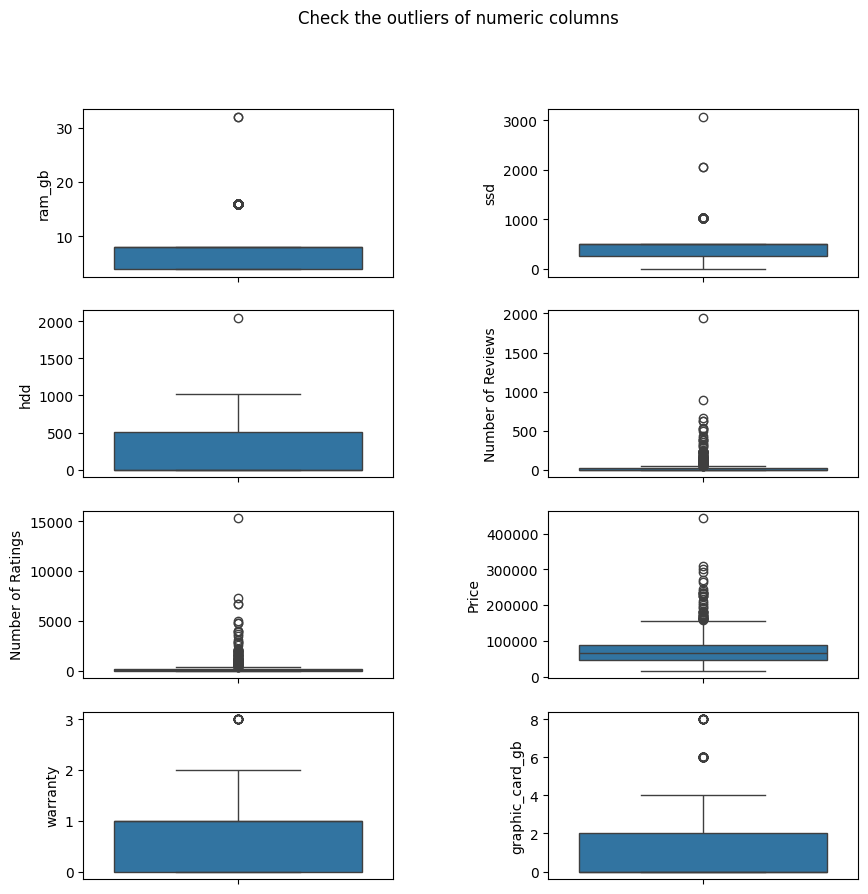

In [1759]:

fig, axes = plt.subplots(4,2,sharex=True,figsize=(10, 10))
fig.suptitle('Check the outliers of numeric columns')
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data=electro, y='ram_gb', ax=axes[0,0])
sns.boxplot(data=electro, y='ssd', ax=axes[0,1])
sns.boxplot(data=electro, y='hdd', ax=axes[1,0])
sns.boxplot(data=electro, y='Number of Reviews', ax=axes[1,1])
sns.boxplot(data=electro, y='Number of Ratings', ax=axes[2,0])
sns.boxplot(data=electro, y='Price', ax=axes[2,1])
sns.boxplot(data=electro, y='warranty', ax=axes[3,0])
sns.boxplot(data=electro, y='graphic_card_gb', ax=axes[3,1])
plt.show()

In [1760]:
numeric = electro[['ram_gb', 'ssd','hdd','graphic_card_gb','warranty','Price','Number of Ratings','Number of Reviews']]
for n in numeric:
    electro[n]=electro[n].astype('float')
    q75 = electro[n].quantile(0.75)
    q25 = electro[n].quantile(0.25)
    iqr = q75 - q25
    electro.loc[electro[n] > q75 + 1.5 * iqr , n] = q75 + 1.5 * iqr
    electro.loc[electro[n] < q25 - 1.5 * iqr , n] = q25 - 1.5 * iqr


In [1761]:
electro.describe()

,ram_gb,ssd,hdd,graphic_card_gb,warranty,Price,Number of Ratings,Number of Reviews
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,8.229462,428.237960,235.331445,1.128895,0.713173,73822.991501,99.922805,12.864377
std,3.544014,261.908392,414.966044,1.807498,0.575095,35287.247989,144.405461,18.577401
min,4.000000,0.000000,0.000000,0.000000,0.000000,16990.000000,0.000000,0.000000
25%,4.000000,256.000000,0.000000,0.000000,0.000000,45600.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,0.000000,1.000000,64990.000000,17.000000,2.000000
75%,8.000000,512.000000,512.000000,2.000000,1.000000,89918.000000,154.500000,19.750000
max,14.000000,896.000000,1280.000000,5.000000,2.500000,156395.000000,386.250000,49.375000


In [1762]:
#one hot encoding
# electro['msoffice'].unique()
# electro['Touchscreen'].unique()

electro = pd.get_dummies(electro, columns = ['msoffice','Touchscreen','brand','processor_brand','processor_name','ram_type','os','weight'],drop_first=True,dtype=int)
#electro = pd.get_dummies(electro, columns = ['brand','processor_brand','processor_name','ram_type','os','weight'],drop_first=True)
# electro['msoffice_Yes'] = electro['msoffice_Yes'].astype(int)
# electro['Touchscreen_Yes'] = electro['Touchscreen_Yes'].astype(int)



In [1763]:
# binary encoding
#import category_encoders as ce
#!pip install category_encoders


In [1764]:
# from category_encoders.binary import BinaryEncoder
# en = BinaryEncoder(cols=['brand','processor_brand','processor_name','ram_type','os','weight'], drop_invariant=True)
# en.fit(electro)
# electro = en.transform(electro)
#electro = pd.DataFrame()
#print(en)

In [1765]:
electro.head()

,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,warranty,Price,rating,Number of Ratings,Number of Reviews,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,weight_Gaming,weight_ThinNlight
0,11,4.0,0.0,512.0,0.0,0.0,45990.0,3,0.00,0.000,...,0,0,0,1,0,0,0,1,0,0
1,10,8.0,0.0,512.0,4.0,0.0,106167.0,4,386.25,49.375,...,0,0,1,0,0,0,0,0,0,0
2,11,4.0,0.0,512.0,0.0,0.0,22990.0,3,0.00,0.000,...,0,0,0,0,0,0,0,1,0,0
3,11,4.0,256.0,0.0,0.0,1.0,44990.0,4,42.00,4.000,...,0,0,0,0,0,0,0,1,0,0
4,11,14.0,512.0,0.0,2.0,1.0,79990.0,3,23.00,6.000,...,0,0,0,0,0,0,0,1,0,0


In [1766]:
X = electro.drop(columns=['rating'])
Y = electro['rating']
X

,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,warranty,Price,Number of Ratings,Number of Reviews,msoffice_Yes,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,weight_Gaming,weight_ThinNlight
0,11,4.0,0.0,512.0,0.0,0.0,45990.0,0.00,0.000,0,...,0,0,0,1,0,0,0,1,0,0
1,10,8.0,0.0,512.0,4.0,0.0,106167.0,386.25,49.375,0,...,0,0,1,0,0,0,0,0,0,0
2,11,4.0,0.0,512.0,0.0,0.0,22990.0,0.00,0.000,0,...,0,0,0,0,0,0,0,1,0,0
3,11,4.0,256.0,0.0,0.0,1.0,44990.0,42.00,4.000,1,...,0,0,0,0,0,0,0,1,0,0
4,11,14.0,512.0,0.0,2.0,1.0,79990.0,23.00,6.000,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,11,4.0,256.0,0.0,0.0,0.0,39998.0,10.00,1.000,0,...,0,0,0,0,0,0,0,1,0,0
719,11,8.0,512.0,0.0,0.0,0.0,44990.0,0.00,0.000,0,...,0,0,0,0,0,0,0,1,0,1
720,11,8.0,512.0,0.0,0.0,2.5,64990.0,48.00,12.000,1,...,0,0,0,0,0,0,0,1,0,0
721,10,8.0,0.0,512.0,5.0,0.0,156395.0,24.00,5.000,0,...,0,0,1,0,0,0,0,0,0,0


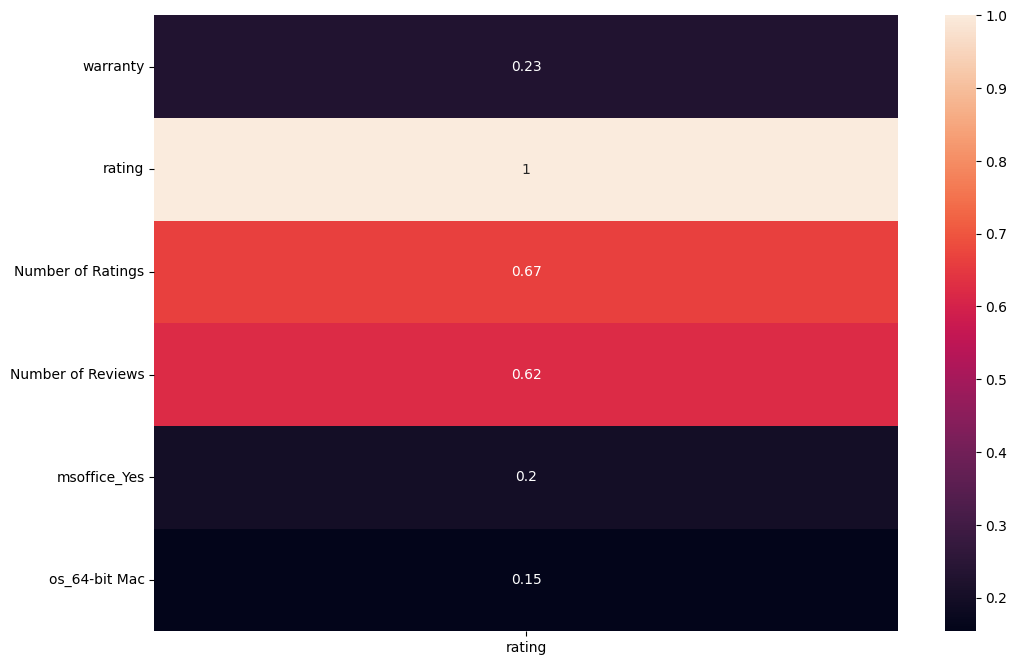

,warranty,Number of Ratings,Number of Reviews,msoffice_Yes,os_64-bit Mac
0,0.0,0.00,0.000,0,0
1,0.0,386.25,49.375,0,0
2,0.0,0.00,0.000,0,0
3,1.0,42.00,4.000,1,0
4,1.0,23.00,6.000,1,0
...,...,...,...,...,...
718,0.0,10.00,1.000,0,0
719,0.0,0.00,0.000,0,0
720,2.5,48.00,12.000,1,0
721,0.0,24.00,5.000,0,0


In [1767]:
corr = electro.corr(method='spearman')
top_feature = corr.loc[abs(corr['rating'])>0.15,'rating']

plt.subplots(figsize=(12, 8))

top_feature = pd.DataFrame(top_feature)
sns.heatmap(top_feature, annot=True)
plt.show()
top_feature = top_feature.drop('rating', axis=0)

First_feature_selection = X[top_feature.index]
First_feature_selection

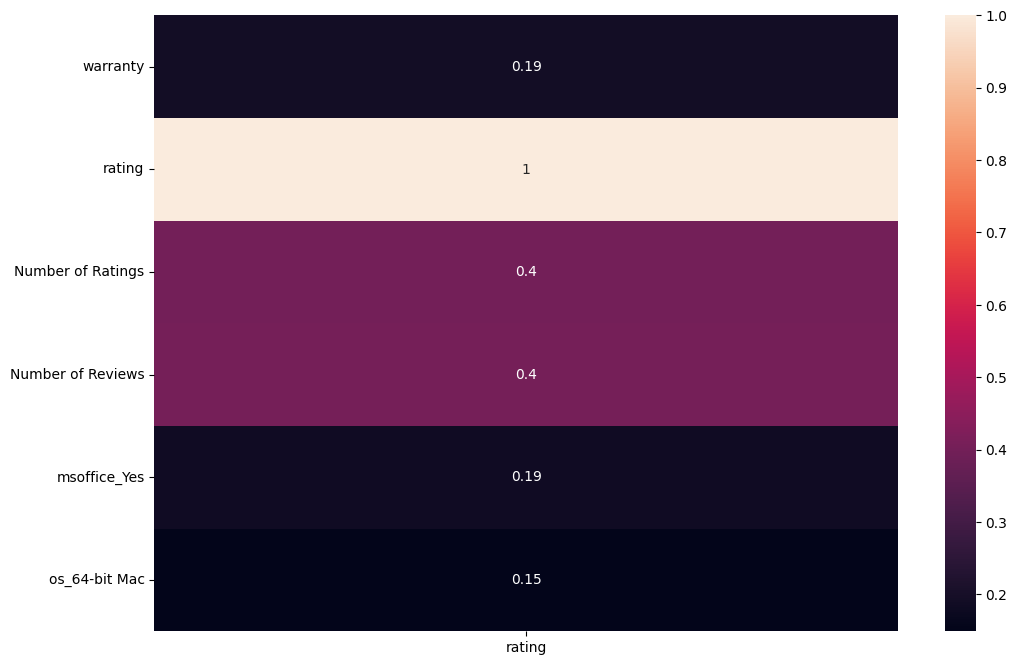

,warranty,Number of Ratings,Number of Reviews,msoffice_Yes,os_64-bit Mac
0,0.0,0.00,0.000,0,0
1,0.0,386.25,49.375,0,0
2,0.0,0.00,0.000,0,0
3,1.0,42.00,4.000,1,0
4,1.0,23.00,6.000,1,0
...,...,...,...,...,...
718,0.0,10.00,1.000,0,0
719,0.0,0.00,0.000,0,0
720,2.5,48.00,12.000,1,0
721,0.0,24.00,5.000,0,0


In [1768]:
corr2 = electro.corr(method='pearson')
top_feature2 = corr2.loc[abs(corr['rating'])>0.15,'rating']

plt.subplots(figsize=(12, 8))

top_feature2 = pd.DataFrame(top_feature2)
sns.heatmap(top_feature2, annot=True)
plt.show()
top_feature2 = top_feature2.drop('rating', axis=0)

second_feature_selection = X[top_feature2.index]
second_feature_selection

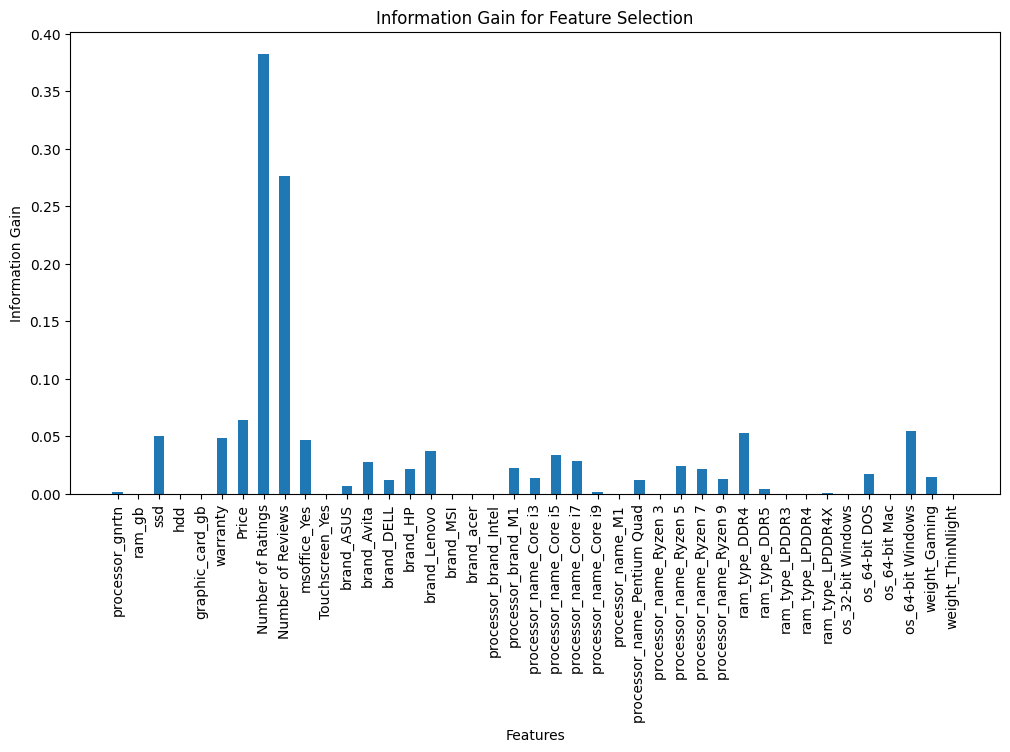

                   Information Gain
Number of Ratings          0.382686
Number of Reviews          0.276487


,Number of Ratings,Number of Reviews
0,0.00,0.000
1,386.25,49.375
2,0.00,0.000
3,42.00,4.000
4,23.00,6.000
...,...,...
718,10.00,1.000
719,0.00,0.000
720,48.00,12.000
721,24.00,5.000


In [1769]:
from sklearn.feature_selection import mutual_info_regression

# Calculate information gain for each feature
info_gain = mutual_info_regression(X, Y)

# Select features with information gain greater than 0.15
top_feature_idx = np.where(info_gain > 0.15)[0]
top_feature_names = X.columns[top_feature_idx]
top_feature_df = pd.DataFrame(data=info_gain[top_feature_idx], index=top_feature_names, columns=['Information Gain'])

plt.figure(figsize=(12, 6))
#plt.barh(X.columns, info_gain, color='skyblue', height=0.6)
plt.bar(X.columns, info_gain,width=0.5)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Information Gain for Feature Selection')
plt.show()
print(top_feature_df)
third_feature_selection = X[top_feature_df.index]
third_feature_selection